# 商品数据分析报告 尹兴广 22019207058

## 1、导入所设计的python包，并做基本的数据处理

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### 读取数据，并展示两个数据集的前5条数据

In [2]:
Basket=pd.read_csv(r'D:\1研课程\python计算\Basket-2018-06-01-2018-07-05.csv')
item=pd.read_csv(r'D:\1研课程\python计算\item-2018-06-01-2018-07-05.csv')
Basket.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


In [3]:
item.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018-06-01,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018-06-01,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018-06-01,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018-06-01,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018-06-01,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


#### 检验是否数据是否存在缺失值

In [4]:
print(Basket.isnull().any())
print("*"*30)
print(item.isnull().any())

SHOP_DATETIME    False
STORE_CODE       False
POS_NO           False
BASK_CODE        False
BASK_SPEND       False
dtype: bool
******************************
SDATE              False
STORE_CODE         False
POSID              False
BASK_CODE          False
PROD_CODE          False
ITEM_QUANTITY      False
ITEM_SPEND         False
NORMAL_PRICE       False
DISCOUNT_TYPE      False
DISCOUNT_AMOUNT    False
dtype: bool


### 2、数据集基本的统计特征的描述和分析

#### Basket数据集的基本统计特征展示

In [5]:
Basket.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


从用户购买消费来看，平均值为39.58元，中位数为20元，最小值为0.01元，最大值为79920元。标准差为196，表明用户之间的消费差距浮动较大。在购买情况来看，服从长尾理论。

#### item数据集的基本统计特征展示

In [6]:
item.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06,1.732761e+06
mean,2.994959e+00,1.659824e+05,1.144861e+05,1.436702e+00,1.285536e+01,1.424412e+01,-1.624232e+00
std,2.470286e+00,8.583102e+04,8.161988e+04,7.015504e+00,1.022148e+02,2.403937e+01,5.160490e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-6.000000e+02,-3.594000e+04,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.995200e+04,2.183500e+04,1.000000e+00,3.800000e+00,3.800000e+00,-1.000000e+00
50%,2.000000e+00,1.758280e+05,1.233210e+05,1.000000e+00,7.000000e+00,7.800000e+00,0.000000e+00
75%,3.000000e+00,2.229530e+05,1.959930e+05,1.000000e+00,1.200000e+01,1.500000e+01,0.000000e+00
max,2.000000e+01,3.239140e+05,2.250470e+05,4.020000e+03,6.912000e+04,1.980000e+03,9.300000e+02


从商品单价来看，平均值为13元，最小值为0元，中位数为7元，最大值为69120元，标准差为9.33，说明价格有一定的浮动。 折扣幅度来看，平均折扣为1.6元，中位数为0元，最大折扣为57600元，最小幅度为涨价226元。

### 3、销售额的统计

#### 根据STORE_CODE统计销售额

In [7]:
sell1 =Basket.groupby(by="STORE_CODE")
sell_groupby_STORE_CODE = sell1["BASK_SPEND"].sum()
sell_groupby_STORE_CODE

STORE_CODE
A001    3.435303e+06
A004    5.123467e+05
A006    9.383050e+05
A007    6.866382e+05
A008    1.311171e+06
A009    7.977389e+05
A010    6.448924e+05
A012    8.469747e+05
A013    1.117126e+06
A016    7.398143e+05
A017    3.945074e+05
A018    5.584417e+05
A019    6.486686e+05
A021    7.387401e+05
A022    4.874459e+05
D002    3.129447e+06
D003    2.435843e+05
D004    8.078603e+05
D005    5.541030e+05
D006    7.935042e+05
D007    1.361607e+06
D008    6.930078e+05
D009    4.704280e+05
D010    3.636179e+05
Name: BASK_SPEND, dtype: float64

#### 根据STORE_CODE统计销售额

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 <a list of 24 Text xticklabel objects>)

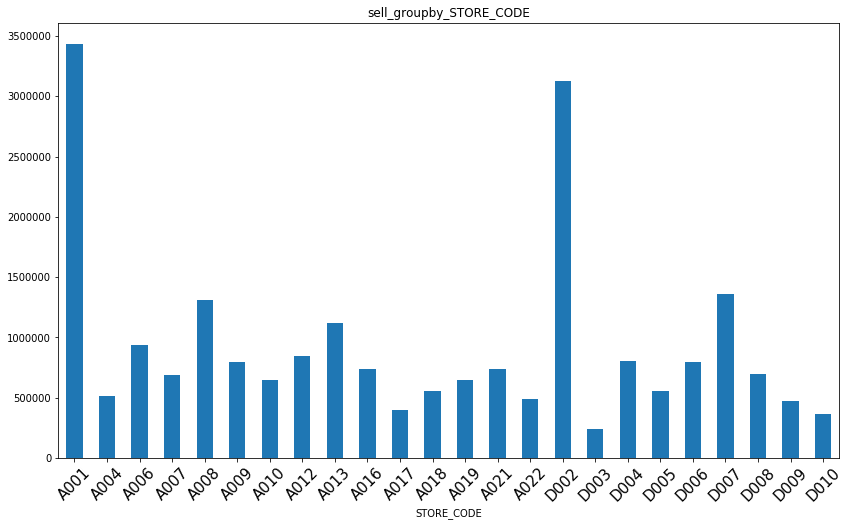

In [8]:
#根据STORE_CODE统计销售额
sell_groupby_STORE_CODE.plot(kind='bar',title='sell_groupby_STORE_CODE',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

A001 和 D002的销售总额占据了绝大部分

#### 根据SHOP_DATETIME统计总销售额

In [9]:
sell2 =Basket.groupby(by="SHOP_DATETIME")
sell_groupby_SHOP_DATETIME = sell2["BASK_SPEND"].sum()
sell_groupby_SHOP_DATETIME

SHOP_DATETIME
2018-06-01     717327.28
2018-06-02     727910.16
2018-06-03     682779.75
2018-06-04     557813.05
2018-06-05     663394.81
2018-06-06     498250.71
2018-06-07     436109.19
2018-06-08     564402.27
2018-06-09     679629.48
2018-06-10     702961.56
2018-06-11     532263.20
2018-06-12     569290.86
2018-06-13     722874.45
2018-06-14     615684.90
2018-06-15     774897.74
2018-06-16    1172798.62
2018-06-17    1506093.31
2018-06-18    1257825.41
2018-06-19     412881.99
2018-06-20     533702.81
2018-06-21     493064.51
2018-06-22     411610.22
2018-06-23     582622.57
2018-06-24     529053.77
2018-06-25     454961.04
2018-06-26     453298.13
2018-06-27     527871.74
2018-06-28     438126.70
2018-06-29     568749.99
2018-06-30     719873.69
2018-07-01     653284.63
2018-07-02     520731.01
2018-07-03     542603.77
2018-07-04     559139.42
2018-07-05     491390.33
Name: BASK_SPEND, dtype: float64

#### 绘制根据不同的日期，每日销量总数的柱状图

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]),
 <a list of 35 Text xticklabel objects>)

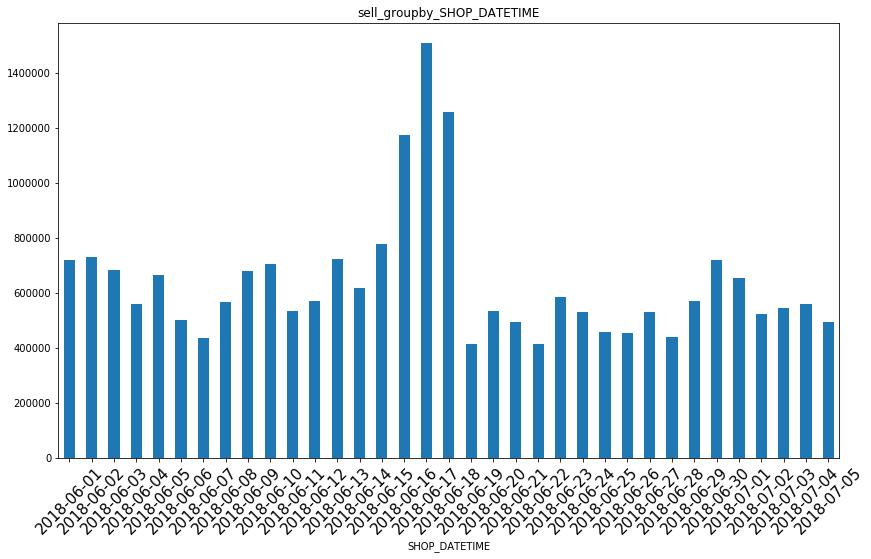

In [10]:
Bask_spend_dt=Basket['BASK_SPEND'].groupby(Basket['SHOP_DATETIME']).sum()
plt.rcParams['axes.unicode_minus'] = False
Bask_spend_dt.plot(kind='bar',title='sell_groupby_SHOP_DATETIME',figsize=(14,8))
plt.xticks(fontsize=15,rotation=45)

从上图可以看出，消费金额8月16-18日达到了高峰。其中在8月17日，销售额达到了最大值，之后消费金额呈下降趋势，并不断趋于平稳的状态。

### 4、产品价格分组分布

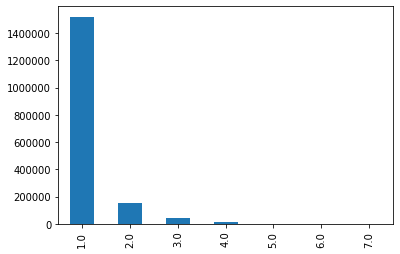

In [11]:

prices = []
for price in item['ITEM_SPEND']:
    if 0 <= price < 20:
        prices.append(1)  #  1
    elif 20 <= price < 50:
        prices.append(2)  # 
    elif 50 <= price < 100:
        prices.append(3)  #
    elif 100 <= price < 500:
        prices.append(4)  #
    elif 500 <= price < 1000:
        prices.append(5)  #
    elif 1000 <= price < 2000:
        prices.append(6)  #
    elif 2000 <= price:
        prices.append(7)  #
        
item['price'] = pd.DataFrame(prices)
item.price.value_counts().plot(kind='bar')# 柱状图 
 

价格集中在1~100元

#### 销售量前十统计

In [12]:
productId_count = item.groupby('PROD_CODE')['BASK_CODE'].count().sort_values(ascending=False)
print(productId_count.head(10))

PROD_CODE
205540    12622
21835     10459
194690     9548
72811      7747
178462     7373
197532     7289
205437     6725
1557       6041
109584     5932
216571     5675
Name: BASK_CODE, dtype: int64


#### 销售额前十统计

In [13]:
productId_amount = item.groupby('PROD_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(productId_amount.head(10))

PROD_CODE
7137      405757.50
7133      289616.00
136839    280198.10
149413    173332.43
1239      148703.20
154900    140534.90
220834    127344.90
21835     114438.46
88160     103116.80
3971       84488.00
Name: ITEM_SPEND, dtype: float64


#### 分析折扣与销售量情况

In [14]:
discount_category=item.groupby(['DISCOUNT_TYPE']).sum()[['ITEM_SPEND']]
discount_category.sort_values('ITEM_SPEND',ascending=False,inplace=True)
discount_category['cum_percent']=discount_category['ITEM_SPEND'].cumsum()/discount_category['ITEM_SPEND'].sum()
discount_category.reset_index()

,DISCOUNT_TYPE,ITEM_SPEND,cum_percent
0,n,1.443738e+07,0.648135
1,p,5.333506e+06,0.887571
2,m,2.149204e+06,0.984055
3,v,1.905812e+05,0.992610
4,x,9.153040e+04,0.996719
5,q,4.557680e+04,0.998765
6,Z,2.390443e+04,0.999839
7,s,3.573290e+03,0.999999
8,h,2.150000e+01,1.000000


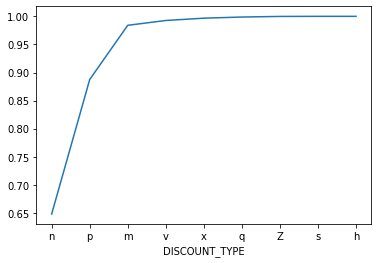

In [15]:
discount_category['cum_percent'].plot()

n,p,m三种折扣类型占据了99%以上的销售额

### 5、客户消费分析

In [16]:
grouped_Customer = Basket[['BASK_CODE','SHOP_DATETIME', 
          'BASK_SPEND']].sort_values(['SHOP_DATETIME']).groupby('BASK_CODE')
grouped_Customer.head()

,BASK_CODE,SHOP_DATETIME,BASK_SPEND
0,250458,2018-06-01,8.00
215287,161017,2018-06-01,9.90
215286,161158,2018-06-01,4.00
215285,250476,2018-06-01,86.40
215284,5399,2018-06-01,23.20
...,...,...,...
284188,124629,2018-07-05,64.67
284189,124651,2018-07-05,56.63
284190,124533,2018-07-05,23.45
284192,149769,2018-07-05,7.90


#### 用户第一次消费（首购）

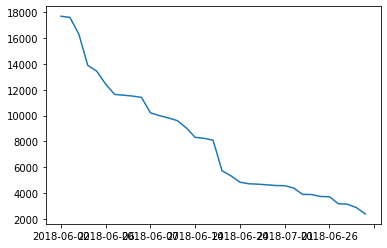

In [17]:
grouped_Customer.min().SHOP_DATETIME.value_counts().plot()

用户第一次购买时间，集中在统计周期的前几天，表明老用户占比较大。

#### 用户最后一次消费

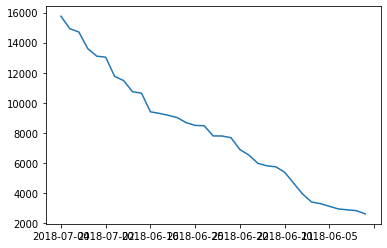

In [18]:
grouped_Customer.max().SHOP_DATETIME.value_counts().plot()

用户最后一次购买的分布和用户第一次购买分布相反，大部分用户最后一次购买集中在最后一周，说明用户粘性较好。